# CARDIO

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Анализ сердечно-сосудистых заболеваний на основе Cardiovascular Disease Dataset

Исследование проводится на основе датасета Cardiovascular Disease Dataset (cardio_train.csv), взятого с Kaggle. В нем собраны данные медицинских обследований пациентов, включая объективные признаки (возраст, рост, вес, пол), медицинские показатели (артериальное давление, уровень холестерина и глюкозы) и субъективные факторы (курение, употребление алкоголя, физическая активность).

Цель исследования — выявить ключевые факторы, влияющие на развитие сердечно-сосудистых заболеваний, провести анализ взаимосвязей между признаками, а также разработать предсказательные модели, включая глубокие нейронные сети, для точного прогнозирования наличия заболеваний.
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

### Описание датасета Cardiovascular Disease Dataset (cardio_train.csv)

#### В датасете представлены три типа входных признаков:
•	**Объективные:** фактическая информация

•	**Обследование:** результаты медицинского обследования

•	**Субъективные:** информация, предоставленная пациентом

#### Признаки:
•	**Age (Возраст)** | Объективный признак | age | целое число (в днях)

•	**Height (Рост)** | Объективный признак | height | целое число (в см)

•	**Weight (Вес)** | Объективный признак | weight | число с плавающей точкой (в кг)

•	**Gender (Пол)** | Объективный признак | gender | категориальный код

•	**Systolic blood pressure (Систолическое артериальное давление)** | Признак обследования | ap_hi | целое число

•	**Diastolic blood pressure (Диастолическое артериальное давление)** | Признак обследования | ap_lo | целое число

•	**Cholesterol (Уровень холестерина)** | Признак обследования | cholesterol | 1: норма, 2: выше нормы, 3: значительно выше нормы

•	**Glucose (Уровень глюкозы)** | Признак обследования | gluc | 1: норма, 2: выше нормы, 3: значительно выше нормы

•	**Smoking (Курение)** | Субъективный признак | smoke | бинарный

•	**Alcohol intake (Употребление алкоголя)** | Субъективный признак | alco | бинарный

•	**Physical activity (Физическая активность)** | Субъективный признак | active | бинарный

•	**Presence or absence of cardiovascular disease (Наличие или отсутствие сердечно-сосудистого заболевания)** | Целевая переменная | cardio | бинарный

*Все значения в датасете были собраны в момент медицинского обследования.*

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy.stats import mannwhitneyu, normaltest
import statsmodels.formula.api as smf
import joblib

RAND = 123
K = 5

In [2]:
df = pd.read_csv(r"D:\DataScience\Projects\Cardio\data\raw\cardio_train.csv", sep=';')

## 1. Exploratory Data Analysis

In [3]:
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [5]:
df = df.drop('id', axis=1)  # Удаление колонки id

Признаки gender, cholesterol, gluc, smoke, alco и active являются категориальными, поэтому их тип данных будет приведён к `object`.

In [6]:
df[['gender', 'cholesterol', 'gluc', 'smoke', 'alco', 'active']] = df[['gender', 'cholesterol', 'gluc', 'smoke', 'alco', 'active']].astype(object)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          70000 non-null  int64  
 1   gender       70000 non-null  object 
 2   height       70000 non-null  int64  
 3   weight       70000 non-null  float64
 4   ap_hi        70000 non-null  int64  
 5   ap_lo        70000 non-null  int64  
 6   cholesterol  70000 non-null  object 
 7   gluc         70000 non-null  object 
 8   smoke        70000 non-null  object 
 9   alco         70000 non-null  object 
 10  active       70000 non-null  object 
 11  cardio       70000 non-null  int64  
dtypes: float64(1), int64(5), object(6)
memory usage: 6.4+ MB


In [7]:
df.describe()

,age,height,weight,ap_hi,ap_lo,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,19468.865814,164.359229,74.205690,128.817286,96.630414,0.499700
std,2467.251667,8.210126,14.395757,154.011419,188.472530,0.500003
min,10798.000000,55.000000,10.000000,-150.000000,-70.000000,0.000000
25%,17664.000000,159.000000,65.000000,120.000000,80.000000,0.000000
50%,19703.000000,165.000000,72.000000,120.000000,80.000000,0.000000
75%,21327.000000,170.000000,82.000000,140.000000,90.000000,1.000000
max,23713.000000,250.000000,200.000000,16020.000000,11000.000000,1.000000


Сразу обращают на себя внимание значения в колонках `ap_hi` и `ap_lo`, отражающих систолическое и диастолическое артериальное давление соответственно. В данных встречаются как отрицательные, так и крайне завышенные значения, что невозможно с медицинской точки зрения. Обратимся к медицинским источникам: значения артериального давления `250/130 мм рт. ст.` и `50/30 мм рт. ст.` считаются критическими и угрожающими жизни. Эти пределы будут использованы в качестве границ для очистки данных.

* `ap_hi`: будут удалены строки с давлением ниже 50 и выше 250 мм рт. ст.

* `ap_lo`: будут удалены строки с давлением ниже 30 и выше 130 мм рт. ст.

In [8]:
df = df[df.ap_hi.between(50, 250) & df.ap_lo.between(30, 130)]

**Переведу данные в колонке age в года (сейчас там дни). Для этого разделю на 365.25, чтобы учесть высокосный год**

In [9]:
df.age = round(df.age / 365.25, 1)
df.age.describe()

count    68722.000000
mean        53.289996
std          6.757796
min         29.600000
25%         48.300000
50%         53.900000
75%         58.400000
max         64.900000
Name: age, dtype: float64

Анализ проводится на выборке в возрастном диапазоне от 29 до 65 лет. Это важно учитывать при дальнейшем исследовании признаков роста и веса, чтобы корректно интерпретировать выбросы и аномалии.

Далее рассмотрим распределение значений роста.

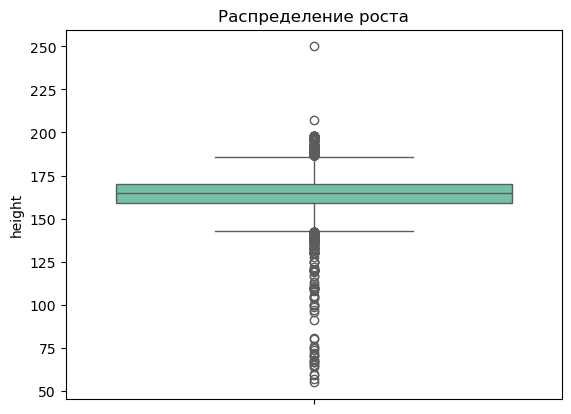

In [10]:
sns.boxplot(df, y='height', color='mediumaquamarine')
plt.title("Распределение роста")
plt.show()

In [11]:
df[['height', 'weight', 'age', 'gender', 'cardio']].sort_values('height', ascending=False)

,height,weight,age,gender,cardio
6486,250,86.0,58.1,1,1
21628,207,78.0,52.2,2,0
57529,198,78.0,51.5,2,1
8897,198,79.0,61.6,2,1
30238,198,89.0,55.8,1,0
...,...,...,...,...,...
27603,64,61.0,57.4,1,0
29157,60,69.0,52.3,1,0
64115,59,57.6,50.4,1,0
66643,57,61.0,51.6,1,1


Мой рост — 190 см. Я нередко встречаю людей выше себя, поэтому допускаю значения роста до 207 см.

Значение 250 см считаю опечаткой и корректирую до 205 см.

Для дальнейшей очистки данных увеличиваю параметр `whis` в boxplot, чтобы расширить границы `усов` вверх и не считать верхние значения выбросами. При этом все значения, которые окажутся выбросами снизу при новых параметрах `whis`, будут удалены как аномальные.

In [12]:
df.loc[df.height == 250, 'height'] = 205
df[['height', 'weight', 'age', 'gender', 'cardio']].sort_values('height', ascending=False)

,height,weight,age,gender,cardio
21628,207,78.0,52.2,2,0
6486,205,86.0,58.1,1,1
57529,198,78.0,51.5,2,1
8897,198,79.0,61.6,2,1
30238,198,89.0,55.8,1,0
...,...,...,...,...,...
27603,64,61.0,57.4,1,0
29157,60,69.0,52.3,1,0
64115,59,57.6,50.4,1,0
66643,57,61.0,51.6,1,1


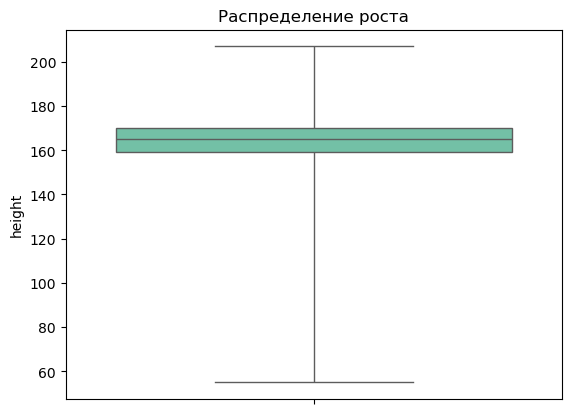

In [13]:
Q1 = df.height.quantile(0.25)
Q3 = df.height.quantile(0.75)
IQR = Q3 - Q1

whis = df.height.max() - Q3 / IQR

sns.boxplot(df, y='height', whis=whis, color='mediumaquamarine')
plt.title("Распределение роста")
plt.show()

Мой метод явно включил в датасет ошибки, связанные с аномально низким ростом. Поэтому такие случаи придётся искать и анализировать вручную.

In [14]:
print(df[(df.height < 120) & (df.weight>100)][['height', 'weight', 'age', 'cardio']].value_counts().sort_index())

height  weight  age   cardio
75      168.0   53.6  1         1
80      178.0   41.9  1         1
81      156.0   52.2  0         1
97      170.0   48.3  1         1
104     159.0   54.3  1         1
        165.0   48.3  0         1
110     105.0   51.9  1         1
112     167.0   54.1  0         1
Name: count, dtype: int64


Предполагаю, что в этих строках перепутаны значения веса и роста. Напишу функцию для их корректировки.

In [15]:
def change_weight_height(row):
    row["height"], row["weight"] = row["weight"], row["height"]  # Меняем местами
    return row

In [16]:
df.loc[(df["height"] < 120) & (df["weight"] > 100)] = df.loc[(df["height"] < 120) & (df["weight"] > 100)].apply(change_weight_height, axis=1)

In [17]:
print(df[(df.height < 120) & (df.weight>100)][['height', 'weight', 'age', 'cardio']].value_counts().sort_index())

height  weight  age   cardio
105     110.0   51.9  1         1
Name: count, dtype: int64


Осталась только одна строка, где вес почти равен росту. Такие данные выглядят неправдоподобно — удалим эту строку.

In [18]:
df[df.height<140][['height', 'weight', 'age', 'gender', 'cardio']].sort_values('height').head(30)

,height,weight,age,gender,cardio
22723,55,81.0,64.0,1,1
66643,57,61.0,51.6,1,1
64115,59,57.6,50.4,1,0
29157,60,69.0,52.3,1,0
27603,64,61.0,57.4,1,0
44490,65,60.0,52.3,1,0
33607,65,72.0,54.0,2,0
50789,67,60.0,39.7,2,0
53344,67,80.0,56.2,2,1
14323,67,57.0,60.2,1,1


Обнаружена ещё одна группа аномалий — рост менее 80 см. Похоже, в этих строках просто пропущена первая цифра, и фактический рост должен быть на 100 см выше.

In [19]:
df.height = df.height.apply(lambda x: x+100 if x<80 else x)

In [20]:
df[df.height<140][['height', 'weight', 'age', 'gender', 'cardio']].sort_values('height').head(30)

,height,weight,age,gender,cardio
28737,91,55.0,54.1,1,1
56022,96,59.0,58.0,1,1
65302,99,60.0,50.6,1,0
58868,100,60.0,40.2,2,0
3420,100,70.0,39.7,1,0
17074,100,86.0,58.2,1,1
64787,105,80.0,64.3,1,1
28897,105,110.0,51.9,1,1
37388,105,72.0,60.4,1,0
39543,108,70.0,40.0,1,1


Оставляю строки с ростом от 120 до 140 см — этот диапазон соответствует низкорослости, но не критической карликовости. Такие данные важны для анализа, так как включают людей с особенностями роста без выраженных патологий.

In [21]:
df = df[df.height >= 120]

In [22]:
df[df.height<140][['height', 'weight', 'age', 'gender', 'cardio']].sort_values('height')

,height,weight,age,gender,cardio
30293,120,80.0,51.5,1,1
22818,120,80.0,46.3,2,1
23024,120,80.0,56.4,1,0
24006,120,90.0,60.3,1,0
24979,120,69.0,57.5,1,0
...,...,...,...,...,...
49320,139,66.0,59.6,1,1
31918,139,48.0,61.4,1,0
28742,139,61.0,53.9,1,0
15621,139,51.0,58.1,1,1


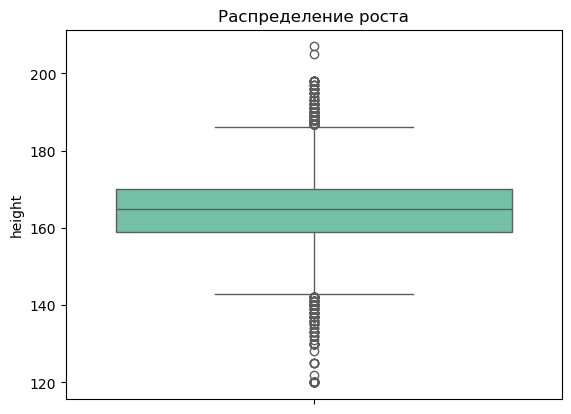

In [23]:
sns.boxplot(df, y='height', color='mediumaquamarine')
plt.title("Распределение роста")  
plt.show()

In [24]:
df.describe()

,age,height,weight,ap_hi,ap_lo,cardio
count,68699.000000,68699.000000,68699.000000,68699.000000,68699.000000,68699.000000
mean,53.290185,164.414548,74.109776,126.611304,81.318695,0.494520
std,6.757581,7.916530,14.300647,16.698145,9.459633,0.499974
min,29.600000,120.000000,11.000000,60.000000,30.000000,0.000000
25%,48.300000,159.000000,65.000000,120.000000,80.000000,0.000000
50%,53.900000,165.000000,72.000000,120.000000,80.000000,0.000000
75%,58.400000,170.000000,82.000000,140.000000,90.000000,1.000000
max,64.900000,207.000000,200.000000,240.000000,130.000000,1.000000


Следующим шагом анализирую колонку "вес"

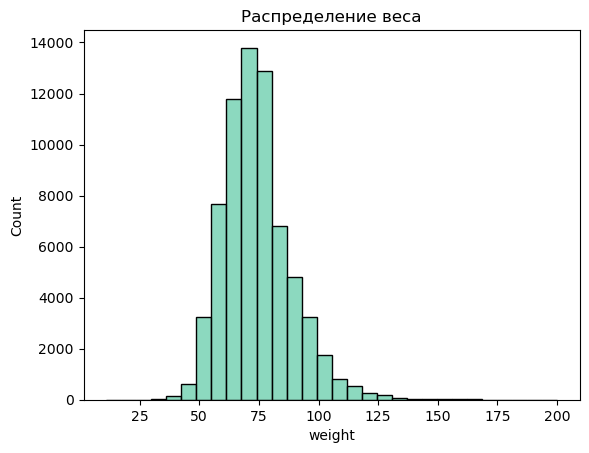

In [25]:
sns.histplot(df, x='weight', bins=30, color='mediumaquamarine')
plt.title("Распределение веса")  
plt.show()

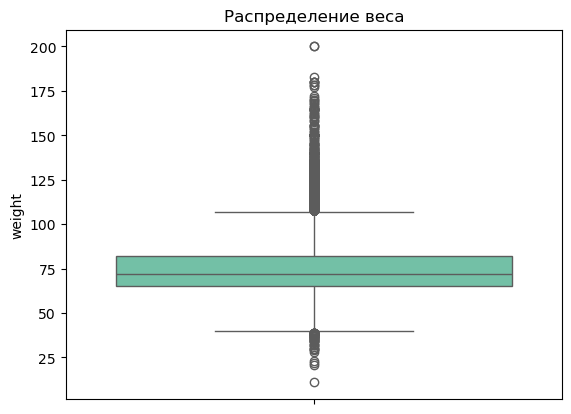

In [26]:
sns.boxplot(df, y='weight', color='mediumaquamarine')
plt.title("Распределение веса")  
plt.show()

Удаляю строки, в которых вес меньше 40 кг — такие значения считаю недостоверными.

In [27]:
df[['weight', 'height']].sort_values('weight')

,weight,height
33817,11.0,178
60188,21.0,162
29488,22.0,177
26806,23.0,157
34276,28.0,128
...,...,...
60592,180.0,180
4743,180.0,176
61285,183.0,180
435,200.0,186


Оставим всех, у кого масса тела до 200 кг включительно. Рассмотрим только нижнюю границу — применим понятие индекса массы тела (BMI).

BMI рассчитывается по формуле: `BMI = вес (кг) / (рост в метрах)²`

In [28]:
df['bmi'] = df.weight / (df.height / 100)**2

In [29]:
df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi
0,50.4,2,168,62.0,110,80,1,1,0,0,1,0,21.967120
1,55.4,1,156,85.0,140,90,3,1,0,0,1,1,34.927679
2,51.6,1,165,64.0,130,70,3,1,0,0,0,1,23.507805
3,48.2,2,169,82.0,150,100,1,1,0,0,1,1,28.710479
4,47.8,1,156,56.0,100,60,1,1,0,0,0,0,23.011177


In [30]:
df[['weight', 'height', 'bmi']].sort_values('bmi').head(20)

,weight,height,bmi
33817,11.0,178,3.471784
29488,22.0,177,7.022248
60188,21.0,162,8.001829
26806,23.0,157,9.331007
60699,29.0,171,9.917581
16906,31.0,170,10.726644
18559,30.0,160,11.718750
58200,35.0,169,12.254473
16322,35.0,165,12.855831
38417,32.0,154,13.493001


Согласно данным Всемирной организации здравоохранения, индекс массы тела (BMI), равный 13, считается критически опасным для жизни. Примем это значение в качестве нижней границы — все строки с BMI ниже 13 будут удалены как недостоверные.

In [31]:
df = df[df.bmi>13]

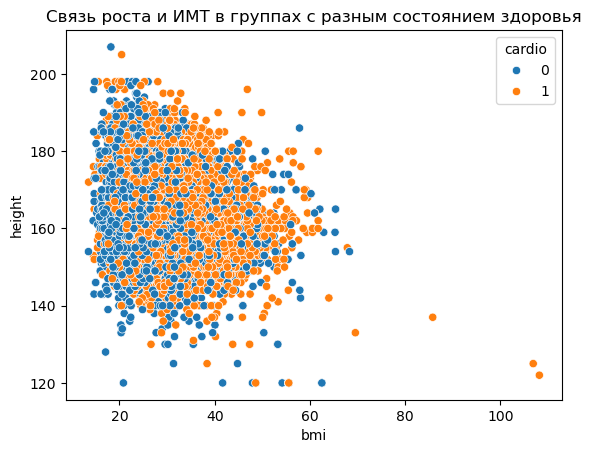

In [32]:
sns.scatterplot(df, x='bmi', y='height', hue='cardio')
plt.title("Связь роста и ИМТ в группах с разным состоянием здоровья")
plt.show()

Также удалю ещё пять аномальных точек в правом нижнем углу, где индекс массы тела превышает 60, а рост менее 140 см — такие сочетания выглядят физиологически маловероятными.

In [33]:
outlier = df[(df.height<140) & (df.bmi>60)]
outlier

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi
6153,57.5,1,122,161.0,120,80,1,1,0,0,1,1,108.169847
12435,60.4,1,137,161.0,150,100,2,1,0,0,0,1,85.779743
15366,47.7,1,125,167.0,180,90,1,2,0,0,1,1,106.880000
24006,60.3,1,120,90.0,120,80,1,1,0,0,0,0,62.500000
57369,54.0,2,120,90.0,120,90,1,1,1,1,1,0,62.500000
67866,59.6,1,133,123.0,180,100,2,1,0,0,1,1,69.534739


In [34]:
df = df.drop(outlier.index)

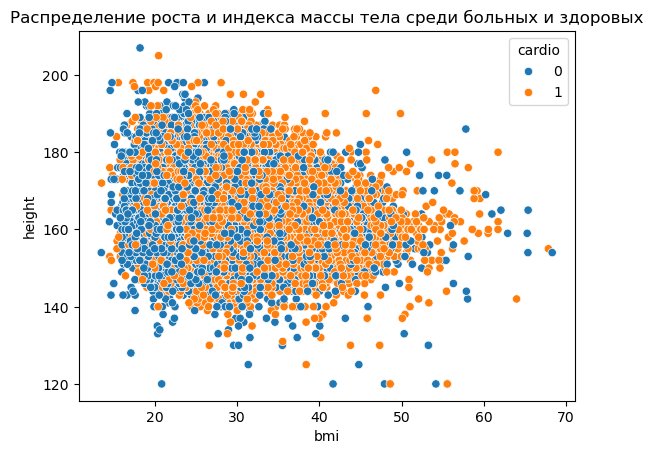

In [35]:
sns.scatterplot(df, x='bmi', y='height', hue='cardio')
plt.title("Распределение роста и индекса массы тела среди больных и здоровых")
plt.show()

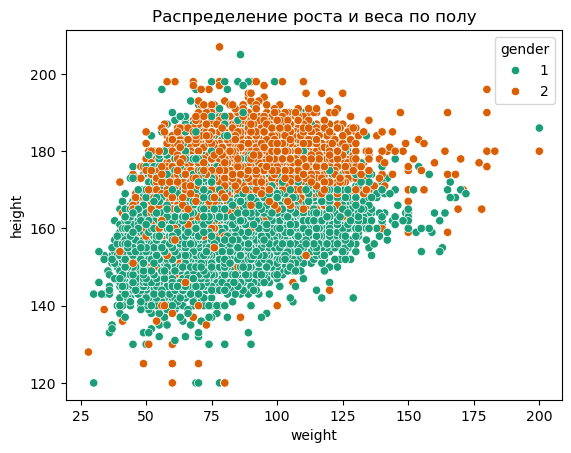

In [36]:
sns.scatterplot(df, x='weight', y='height', hue='gender', palette='Dark2')
plt.title("Распределение роста и веса по полу")
plt.show()

In [37]:
df.describe()

,age,height,weight,ap_hi,ap_lo,cardio,bmi
count,68684.000000,68684.000000,68684.000000,68684.000000,68684.000000,68684.000000,68684.000000
mean,53.289472,164.417463,74.110979,126.610273,81.317963,0.494482,27.452796
std,6.757731,7.908603,14.277932,16.696259,9.459633,0.499973,5.226692
min,29.600000,120.000000,28.000000,60.000000,30.000000,0.000000,13.493001
25%,48.300000,159.000000,65.000000,120.000000,80.000000,0.000000,23.875115
50%,53.900000,165.000000,72.000000,120.000000,80.000000,0.000000,26.346494
75%,58.400000,170.000000,82.000000,140.000000,90.000000,1.000000,30.116213
max,64.900000,207.000000,200.000000,240.000000,130.000000,1.000000,68.308315


In [38]:
df.describe(include=['object'])

,gender,cholesterol,gluc,smoke,alco,active
count,68684,68684,68684,68684,68684,68684
unique,2,3,3,2,2,2
top,1,1,1,0,0,1
freq,44735,51516,58400,62642,65011,55169


In [39]:
round(df.cardio.value_counts(normalize=True)*100, 1)

cardio
0    50.6
1    49.4
Name: proportion, dtype: float64

**Дисбаланс целевой переменной отсутствует — классы распределены достаточно равномерно.**
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


In [40]:
print(f"Средний рост категории 1 в колонке gender: {df.height[df.gender == 1].mean()}")
print(f"Средний рост категории 2 в колонке gender: {df.height[df.gender == 2].mean()}")

Средний рост категории 1 в колонке gender: 161.4280317424835
Средний рост категории 2 в колонке gender: 170.00150319428786


In [41]:
print(f"Средний вес категории 1 в колонке gender: {df.weight[df.gender == 1].mean()}")
print(f"Средний вес категории 2 в колонке gender: {df.weight[df.gender == 2].mean()}")

Средний вес категории 1 в колонке gender: 72.46956521739132
Средний вес категории 2 в колонке gender: 77.17702200509416


Предполагаю, что в колонке gender значение `1` соответствует женщинам. Такое допущение основано на нескольких наблюдениях: во-первых, женщины, как правило, чаще проходят медицинские обследования; во-вторых, в группе с кодом `1` наблюдаются более низкие средние значения роста и веса, что также указывает на женскую выборку. Таким образом, по совокупности косвенных признаков и личного опыта можно сделать вывод: `1 — Female`, `2 — Male`.

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 68684 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          68684 non-null  float64
 1   gender       68684 non-null  object 
 2   height       68684 non-null  int64  
 3   weight       68684 non-null  float64
 4   ap_hi        68684 non-null  int64  
 5   ap_lo        68684 non-null  int64  
 6   cholesterol  68684 non-null  object 
 7   gluc         68684 non-null  object 
 8   smoke        68684 non-null  object 
 9   alco         68684 non-null  object 
 10  active       68684 non-null  object 
 11  cardio       68684 non-null  int64  
 12  bmi          68684 non-null  float64
dtypes: float64(3), int64(4), object(6)
memory usage: 7.3+ MB


В результате очистки было удалено 1316 строк, что составляет примерно 1,88% от общего объема данных.